# Project Goals and Workflow Overview

### Dataset Description  
The analysis is based on the Dirty Cafe Sales dataset, available on Kaggle:
https://www.kaggle.com/datasets/ahmedmohamed2003/cafe-sales-dirty-data-for-cleaning-training (accessed: 2025-04-05).

The dataset consists of 10,000 rows and 8 columns. Each record represents a single transaction made in a cafe during 2023.
The dataset includes information such as the item purchased, quantity, unit price, total amount spent, payment method, transaction location, and transaction date.
Some fields intentionally contain missing, incorrect, or inconsistent values to replicate challenges encountered in real-world data.
This dataset is intended for practicing data cleaning, preprocessing, and exploratory data analysis techniques.


### 📄 Columns Description

| **Column Name**       | **Description**                                                                 | **Example Values**        |
|-----------------------|---------------------------------------------------------------------------------|---------------------------|
| Transaction ID        | A unique identifier for each transaction. Always present and unique.           | TXN_1234567               |
| Item                  | The name of the item purchased. May contain missing or invalid values ("ERROR").| Coffee, Sandwich          |
| Quantity              | The quantity of the item purchased. May contain missing or invalid values.      | 1, 3, UNKNOWN             |
| Price Per Unit        | The price of a single unit. May contain missing or invalid values.              | 2.00, 4.00                |
| Total Spent           | Total amount = Quantity * Price Per Unit.                                       | 8.00, 12.00               |
| Payment Method        | Method of payment. May contain None or "UNKNOWN".                               | Cash, Credit Card         |
| Location              | Transaction location. May contain missing or invalid values.                    | In-store, Takeaway        |
| Transaction Date      | Date of the transaction. May contain missing or incorrect values.               | 2023-01-01                |


### Main goals
1. Load, explore, and clean the dataset by removing duplicates and correcting missing or inconsistent values.
2. Standardize column names and ensure logical consistency, especially for calculated fields like *Total Spent*.
3. Prepare the dataset for analysis by filling missing data and detecting outliers.
4. Improve data quality through validation and error detection mechanisms.
5. Analyze key sales metrics such as total revenue, average transaction value, and best-selling products.
6. Explore seasonal and weekly sales trends to identify purchasing patterns.


### Problems with Data 
**Incomplete Entries**: Several columns, including *Item*, *Quantity*, *Price Per Unit*, *Payment Method*, *Location*, and
*Transaction Date*, contain missing information.  
**Incorrect or Inconsistent Values**: Certain fields, like Item and *Quantity*, include erroneous or inconsistent entries, such as *ERROR* or *UNKNOWN*.  
**Necessary Data Preprocessing**: The dataset demands multiple cleaning actions, including addressing missing data, correcting inconsistencies, and verifying computed fields like *Total Spent* (which should correctly reflect the product of *Quantity* and *Price Per Unit*).

In [1]:
#Cafe Sales dataset
#import libraries
import pandas as pd
import numpy as np
from itertools import cycle
import matplotlib.pyplot as plt
import seaborn as sns

# Default settings for the table:
def default_setting_for_dataframe():
    pd.set_option('display.max_column', None) # displaying all columns
    np.random.seed() # selecting pseudo-random numbers
    pd.set_option("display.width", 0) # automatic adjustment of table width

default_setting_for_dataframe()

# 1. Data Cleaning


In [2]:
# 1. Data Cleaning
# 1.1. Load the dataset – import the CSV file from Kaggle.

# Path to the dataset on Kaggle
file_path = "../input/cafe-sales-dirty-data-for-cleaning-training/dirty_cafe_sales.csv"

# Loading a file from Kaggle dataset in pandas
df = pd.read_csv(file_path)

In [3]:
# 1.2. Initial data exploration – view sample rows and basic structure (head(), tail(), info()).
def basic_overview_and_statistics(df):
    print("\nFirst 10 rows: \n")
    display_first_rows = print(df.head(10)) #Display first 30 rows
    print("\nRandom 10 rows: \n")
    display_random_rows = print(df.sample(10, random_state=42)) #Display random 20 rows (always the same)
    print("\n dataset info: \n")
    dataframe_info = print(df.info()) #Basic information about the table
    print("\n dataset shape: \n")
    dataframe_shape = print(df.shape) #Basic information about the table
    print("\n dataset describe: \n")
    dataframe_describe = print(df.describe().T) #T = transposition of columns and rows

    return df

df = basic_overview_and_statistics(df)


First 10 rows: 

  Transaction ID      Item Quantity Price Per Unit Total Spent  \
0    TXN_1961373    Coffee        2            2.0         4.0   
1    TXN_4977031      Cake        4            3.0        12.0   
2    TXN_4271903    Cookie        4            1.0       ERROR   
3    TXN_7034554     Salad        2            5.0        10.0   
4    TXN_3160411    Coffee        2            2.0         4.0   
5    TXN_2602893  Smoothie        5            4.0        20.0   
6    TXN_4433211   UNKNOWN        3            3.0         9.0   
7    TXN_6699534  Sandwich        4            4.0        16.0   
8    TXN_4717867       NaN        5            3.0        15.0   
9    TXN_2064365  Sandwich        5            4.0        20.0   

   Payment Method  Location Transaction Date  
0     Credit Card  Takeaway       2023-09-08  
1            Cash  In-store       2023-05-16  
2     Credit Card  In-store       2023-07-19  
3         UNKNOWN   UNKNOWN       2023-04-27  
4  Digital Wallet  I

In [4]:
# 1.3. Remove duplicates if present.
def checking_for_duplicates(df):
    df_d = df.duplicated(subset=None, keep="first").sum()  # Counting duplicates
    print(f"Number of duplicates: {df_d}")

    # Removing duplicates, assigning the result to df
    df = df.drop_duplicates()

    # Returning the updated DataFrame
    return df

df = checking_for_duplicates(df)

Number of duplicates: 0


In [5]:
# 1.4. Identify and correct missing, invalid, or inconsistent values across multiple columns.
# Handling missing values
def missing_values_pd(df):
    missing_values_count = df.isnull().sum() #Display missing values for all columns
    print("\nMissing values: \n", missing_values_count)
    total_cells_in_column = total_cells_in_column = df.shape[0] # number of rows in the column
    print("\nNumber of cells in column: \n", total_cells_in_column)
    percent_of_missing_values_in_each_column = missing_values_count / total_cells_in_column*100 #Percent of missing values in each column
    print("\nPercent of missing values in each column: \n", percent_of_missing_values_in_each_column)

    return df

df = missing_values_pd(df)

# Delete columns with missing values
df = df.drop(columns=["Location"])


Missing values: 
 Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

Number of cells in column: 
 10000

Percent of missing values in each column: 
 Transaction ID       0.00
Item                 3.33
Quantity             1.38
Price Per Unit       1.79
Total Spent          1.73
Payment Method      25.79
Location            32.65
Transaction Date     1.59
dtype: float64


In [6]:
# 1.5. Standardize column names for clarity and consistency.
# Changing name of the columns
def changing_name_of_the_columns(df, name_of_column, newname_of_column):
    df = df.rename(columns={name_of_column: newname_of_column})
    print(f"The column name {name_of_column} has been changed to: {newname_of_column}")
    return df

df = changing_name_of_the_columns(df, "Transaction ID", "Transaction_ID")
df = changing_name_of_the_columns(df, "Price Per Unit", "Price_Per_Unit")
df = changing_name_of_the_columns(df, "Total Spent", "Total_Spent")
df = changing_name_of_the_columns(df, "Payment Method", "Payment_Method")
df = changing_name_of_the_columns(df, "Transaction Date", "Transaction_Date")


def add_new_column(df):
    df["Transaction_Date"] = pd.to_datetime(df["Transaction_Date"], errors="coerce")
    df["Weekday_Name"] = df["Transaction_Date"].dt.day_name()
    return df

df = add_new_column(df)

# Display Unique Values for each column
# Quantity, Price Per Unit, Total Spent - checking Naan, Error in Row
def display_unique_values_for_each_column(df):
    for col in df.columns:
        values_count = df[col].value_counts()
        print(f"\nUnique Values for column {col}:\n", values_count)

    print("Wyświetlono unikalne wartości dla każdej z kolumn")
    return df

df = display_unique_values_for_each_column(df)

The column name Transaction ID has been changed to: Transaction_ID
The column name Price Per Unit has been changed to: Price_Per_Unit
The column name Total Spent has been changed to: Total_Spent
The column name Payment Method has been changed to: Payment_Method
The column name Transaction Date has been changed to: Transaction_Date

Unique Values for column Transaction_ID:
 Transaction_ID
TXN_1961373    1
TXN_4831525    1
TXN_1228927    1
TXN_6486912    1
TXN_3447069    1
              ..
TXN_5680238    1
TXN_7766134    1
TXN_2617257    1
TXN_8993132    1
TXN_6170729    1
Name: count, Length: 10000, dtype: int64

Unique Values for column Item:
 Item
Juice       1171
Coffee      1165
Salad       1148
Cake        1139
Sandwich    1131
Smoothie    1096
Cookie      1092
Tea         1089
UNKNOWN      344
ERROR        292
Name: count, dtype: int64

Unique Values for column Quantity:
 Quantity
5          2013
2          1974
4          1863
3          1849
1          1822
UNKNOWN     171
ERROR

In [7]:
# 1.6. Ensure logical consistency, particularly for calculated fields like Total Spent.
# Fill or drop all columns with missing/incorrect data
def three_columns_number(df):
    # Remove rows with ≥2 occurrences of "UNKNOWN"/"ERROR"
    mask = df[["Quantity", "Price_Per_Unit", "Total_Spent"]].isin(["UNKNOWN", "ERROR"]).sum(axis=1) < 2
    df = df[mask].copy()

    # Replace with NaN
    df[["Quantity", "Price_Per_Unit", "Total_Spent"]] = df[["Quantity", "Price_Per_Unit", "Total_Spent"]].replace(["UNKNOWN", "ERROR"], np.nan)
    df[["Quantity", "Price_Per_Unit", "Total_Spent"]] = df[["Quantity", "Price_Per_Unit", "Total_Spent"]].apply(pd.to_numeric, errors="coerce")

    # Filling NaN
    df.loc[df["Quantity"].isna(), "Quantity"] = df["Total_Spent"] / df["Price_Per_Unit"]
    df.loc[df["Total_Spent"].isna(), "Total_Spent"] = df["Quantity"] * df["Price_Per_Unit"]
    df.loc[df["Price_Per_Unit"].isna(), "Price_Per_Unit"] = df["Total_Spent"] / df["Quantity"]

    # Remove rows with ≥2 NaN (after conversion)
    df = df[df[["Quantity", "Price_Per_Unit", "Total_Spent"]].isna().sum(axis=1) < 2].copy()

    print("The missing values in the columns Quantity, Price_Per_Unit, and Total Spent have been filled.")
    return df

df = three_columns_number(df)

Braki w kolumnach Quantity, Price_Per_Unit, Total Spent zostały uzupełnione


# 2. Data Preparation


In [8]:
# 2. Data Preparation
# 2.1. Transform the dataset into a clean, structured format suitable for analysis and visualization.
# Fill values in columns: Item, Payment_Method
# Item - fill based on "Price Per Unit" price
prices = {
    "Coffee":1,
    "Tea":1.5,
    "Sandwich":4,
    "Salad":5,
    "Cake":3,
    "Cookie":1,
    "Smoothie":4,
    "Juice":3
}

def fill_item(df, prices):
    mask = df["Item"].isin(["UNKNOWN", "ERROR"])
    df.loc[mask, "Item"] = df.loc[mask, "Price_Per_Unit"].map(prices)
    print("Missing values in the \"Item\" column have been filled.")
    return df

df = fill_item(df, prices)

print(df["Item"].value_counts())

Missing values in the "Item" column have been filled
Item
Juice       1167
Coffee      1158
Salad       1144
Cake        1134
Sandwich    1122
Smoothie    1089
Cookie      1084
Tea         1081
Name: count, dtype: int64


In [9]:
# 2.2. Payment Method - fill according to the distribution, evenly, not randomly.
# Since payment methods are almost evenly distributed:
# Digital Wallet    2291
# Credit Card       2273
# Cash              2258
# I will add payment methods to missing fields sequentially,
# this is why I am not basing it on the mean or median.
def fill_transaction_method(df):
    unique_values_all = ["Digital Wallet", "Credit Card", "Cash"]
    unique_values = cycle(unique_values_all)  # Loop through available methods

    for i, item in df.iterrows():
        if item["Payment_Method"] == "ERROR" or item["Payment_Method"] == "UNKNOWN":
            # We only change in the "Payment_Method" column
            df.at[i, "Payment_Method"] = next(unique_values)
    print("Missing values in the \"Payment_Method\" column have been filled.\n")

    return df

df = fill_transaction_method(df)

print(df["Payment_Method"].value_counts())

def mode_transaction_date(df):
    # Ensure the "Transaction Date" column is in datetime format
    df["Transaction_Date"] = pd.to_datetime(df["Transaction_Date"], errors="coerce")

    # Calculate the mode (the most frequent date)
    mode_date = df["Transaction_Date"].mode()[0]

    # Fill missing values with the mode (the most frequent date)
    df["Transaction_Date"] = df["Transaction_Date"].fillna(mode_date)

    # Convert to date format (only day, month, year)
    df["Transaction_Date"] = df["Transaction_Date"].dt.date

    print("Missing values in Transaction Date have been filled with the mode value.\n")

    return df


df = mode_transaction_date(df)
print(df["Transaction_Date"].value_counts())

Missing values in the "Payment_Method" column have been filled
Payment_Method
Digital Wallet    2478
Credit Card       2458
Cash              2442
Name: count, dtype: int64
Missing values in Transaction Date have been filled with the mode value
Transaction_Date
2023-02-06    497
2023-06-16     40
2023-07-21     39
2023-07-24     39
2023-03-13     39
             ... 
2023-09-24     15
2023-04-27     15
2023-02-17     14
2023-07-22     14
2023-03-11     14
Name: count, Length: 365, dtype: int64


In [10]:
# 2.3. Data Quality and Error Detection
def total_spent_errors(df):
    # Conversion of columns to float
    df[["Quantity", "Price_Per_Unit", "Total_Spent"]] = df[["Quantity", "Price_Per_Unit", "Total_Spent"]].astype(float)

    # Calculate the expected total (vectorized)
    expected_total = df["Quantity"] * df["Price_Per_Unit"]

    # Identify rows where the Total_Spent is not close to the expected total (vectorized)
    errors = np.abs(df["Total_Spent"] - expected_total) > 0.05

    # Print out errors
    if errors.any():
        for i, row in df[errors].iterrows():
            print(f"Error in row {i}: {row.to_dict()}")

    print("Errors in the rows have been checked.")

    return df

df = total_spent_errors(df)

Errors in the rows have been checked.


In [11]:
# 2.4. Detect outliers
def detect_outliers(df):
    # Calculating Quartiles and IQR
    Q1 = df["Quantity"].quantile(0.25)
    Q3 = df["Quantity"].quantile(0.75)
    IQR = Q3 - Q1

    # Detect outliers
    outliers = (df["Quantity"] < (Q1 - 1.5 * IQR)) | (df["Quantity"] > (Q3 + 1.5 * IQR))
    outliers_count = outliers.sum()

    print(f"Number of outlier values in the 'Quantity' column: {outliers_count}")

    # Filtering rows with outlier values
    outlier_rows = df[outliers]

    # Displaying rows with outlier values
    if not outlier_rows.empty:
        print("Outlier values in the rows:")
        print(outlier_rows)

    return df

detect_outliers(df.select_dtypes(include=[np.number]))

Number of outlier values in the 'Quantity' column: 0


,Quantity,Price_Per_Unit,Total_Spent
0,2.0,2.0,4.0
1,4.0,3.0,12.0
2,4.0,1.0,4.0
3,2.0,5.0,10.0
4,2.0,2.0,4.0
...,...,...,...
9995,2.0,2.0,4.0
9996,3.0,1.0,3.0
9997,4.0,2.0,8.0
9998,3.0,1.0,3.0


# 3. Exploratory Data Analysis (EDA)

In [12]:
# 3. Exploratory Data Analysis (EDA)
# 3.Analyze key sales metrics:
# 3.1. Calculate total revenue and average transaction value.
def total_revenue(df):
    total_revenue = df["Total_Spent"].sum()
    print(f"Total revenue is: {total_revenue}")
    return total_revenue

total_revenue(df)

#Average transaction value (Total Spent / number of transactions).
def average_transaction_value(df):
    total_spent = df["Total_Spent"].sum()  # Sum of all expenses
    total_transactions = df["Transaction_ID"].count()  # Number of all transactions (records)
    average_t_v = round(total_spent / total_transactions, 2)  # Average transaction value
    print(f"Average transaction value is: {average_t_v}")
    return average_t_v

average_transaction_value(df)

print(df.columns)

Total revenue is: 88800.5
Average transaction value is: 8.93
Index(['Transaction_ID', 'Item', 'Quantity', 'Price_Per_Unit', 'Total_Spent',
       'Payment_Method', 'Transaction_Date', 'Weekday_Name'],
      dtype='object')


In [13]:
# 3.2. Identify the most frequently purchased products.
def the_most_frequently_purchased_product(df):
    most_purchased_p = df["Item"].mode()[0]
    print(f"The most frequently purchased product is: {most_purchased_p}")

the_most_frequently_purchased_product(df)

The most frequently purchased product is: Juice


In [14]:
# 3.3. Analyze seasonal sales (spring, summer, autumn, winter).
def seasonality_in_sales(df):
    df["Transaction_Date"] = pd.to_datetime(df["Transaction_Date"])
    # Protection in case the column is missing
    if "Weekday_Name" not in df.columns:
        df["Weekday_Name"] = df["Transaction_Date"].dt.day_name()

    # Interesting periods of the year
    print("=== Seasonal Trends ===")
    seasons = [
        ("Winter", "2023-01-01", "2023-03-21"),
        ("Spring", "2023-03-22", "2023-06-21"),
        ("Summer", "2023-06-22", "2023-09-23"),
        ("Autumn", "2023-09-24", "2023-12-21"),
        ("Late Winter", "2023-12-22", "2023-12-31")
    ]
    # Analyzing the most frequently purchased product in each season
    for name, start, end in seasons:
        item = df.query("Transaction_Date >= @start and Transaction_Date < @end")["Item"].mode()[0]
        print(f"The most purchased Item in {name.lower()} 2023 was: {item}")

    #3.4.Analyze sales by day of the week.
    # Analyzing the most frequently purchased product on each day of the week
    print("\n=== Weekly Trends ===")
    for day in ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]:
        item = df.query("Weekday_Name == @day")["Item"].mode()[0]
        print(f"The most purchased Item on {day}s in 2023 was: {item}")

seasonality_in_sales(df)

=== Seasonal Trends ===
The most purchased Item in winter 2023 was: Cake
The most purchased Item in spring 2023 was: Juice
The most purchased Item in summer 2023 was: Tea
The most purchased Item in autumn 2023 was: Coffee
The most purchased Item in late winter 2023 was: Juice

=== Weekly Trends ===
The most purchased Item on Mondays in 2023 was: Juice
The most purchased Item on Tuesdays in 2023 was: Cake
The most purchased Item on Wednesdays in 2023 was: Salad
The most purchased Item on Thursdays in 2023 was: Cake
The most purchased Item on Fridays in 2023 was: Coffee
The most purchased Item on Saturdays in 2023 was: Sandwich
The most purchased Item on Sundays in 2023 was: Juice


# 4. Visualization


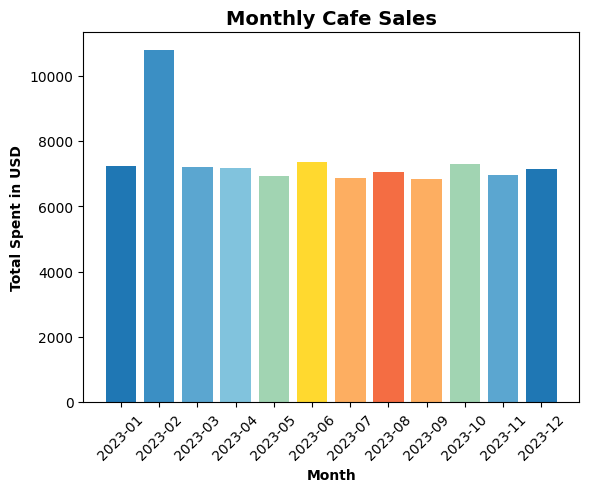

In [15]:
# 4. Visualization
# 4.1. Create boxplot to explore the distribution of Total Spent for each product category.
#Revenue over Time
df["Transaction_Date"] = pd.to_datetime(df["Transaction_Date"])  # make sure it's datetime
df["Month"] = df["Transaction_Date"].dt.to_period("M")  # 2023-01, 2023-02 etc.
monthly_spent = df.groupby("Month")["Total_Spent"].sum()

colors = [
    "#1f77b4",  # January – cool blue
    "#3b8fc4",  # February – lighter blue
    "#5ba6d0",  # March – blue-cyan
    "#81c3dd",  # April – sky blue
    "#a1d4b2",  # May – greenish
    "#ffd92f",  # June – yellow
    "#fdae61",  # July – orange
    "#f46d43",  # August – strong orange
    "#fdae61",  # September – still warm
    "#a1d4b2",  # October – green returns
    "#5ba6d0",  # November – cooler again
    "#1f77b4",  # December – back to cool blue
]

plt.bar(monthly_spent.index.astype(str), monthly_spent.values, color=colors)
plt.xlabel("Month", fontweight="bold")
plt.ylabel("Total Spent in USD", fontweight="bold")
plt.title("Monthly Cafe Sales", fontsize=14, fontweight="bold")
plt.xticks(rotation=45)  # rotate X-axis labels

plt.show()

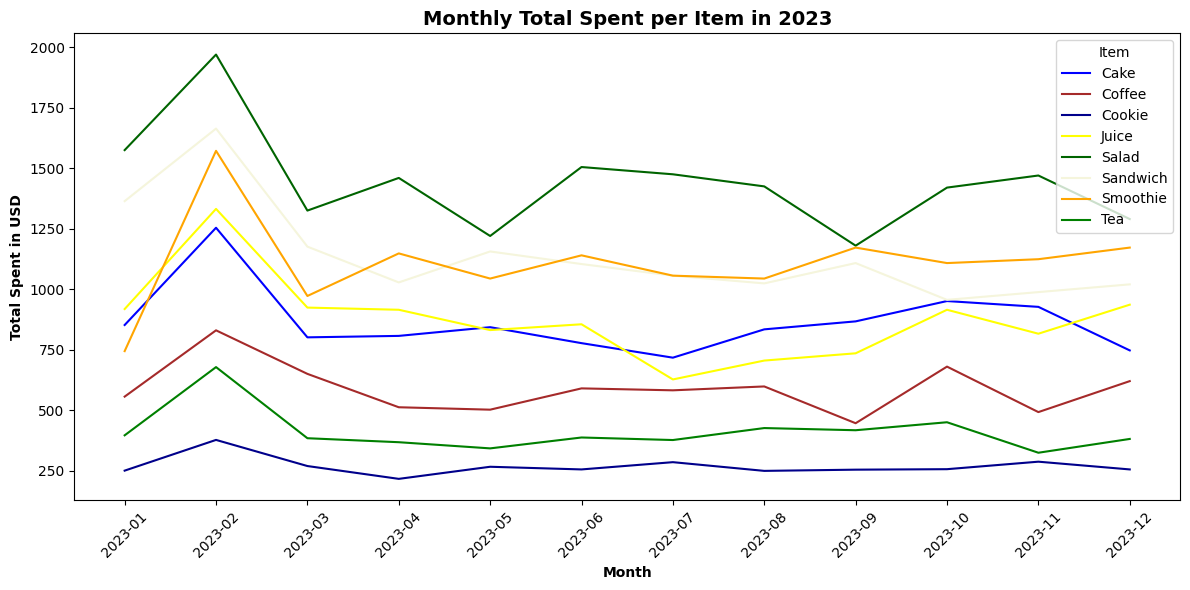

In [16]:
# 4.2. Line plot showing sales of all products throughout the year
# Convert the "Transaction Date" column to datetime format for date-based operations
df["Transaction_Date"] = pd.to_datetime(df["Transaction_Date"])
# Create a new "Month" column with year-month format (e.g., '2023-01')
df["Month"] = df["Transaction_Date"].dt.to_period("M").astype(str)

# Group by "Month" and "Item", then sum the "Total Spent" for each combination
# The .unstack() function reshapes the data, with each product as a column
monthly = df.groupby(["Month", "Item"])["Total_Spent"].sum().unstack()

# Dictionary mapping products to specific colors for plotting
colors2 = {
    "Coffee": "brown",
    "Tea": "green",
    "Sandwich": "beige",
    "Salad": "darkgreen",
    "Cake": "blue",
    "Cookie": "darkblue",
    "Smoothie": "orange",
    "Juice": "yellow"
}

# Set up the plot size (12x6 inches)
plt.figure(figsize=(12, 6))

# Iterate through each product (each column) in the "monthly" DataFrame
for item in monthly.columns:
    # Get the color for the product from the "colors" dictionary; default to "gray" if not found
    color = colors2.get(item, "gray")  # Default color is gray if the product is not found in the dictionary
    # Plot the data for the current product with the specified color and label
    plt.plot(monthly.index, monthly[item], label=item, color=color)

# Add a title to the plot with bold font and a font size of 14
plt.title("Monthly Total Spent per Item in 2023", fontsize=14, fontweight="bold")

# Label the x-axis as "Month" with bold font
plt.xlabel("Month", fontweight="bold")

# Label the y-axis as "Total Spent in USD" with bold font
plt.ylabel("Total Spent in USD", fontweight="bold")

# Add a legend with the title "Item" to indicate which color corresponds to which product
plt.legend(title="Item")

# Rotate the x-axis labels (months) by 45 degrees for better readability
plt.xticks(rotation=45)

# Adjust the layout to prevent overlap and ensure everything fits in the plot area
plt.tight_layout()

# Display the plot
plt.show()

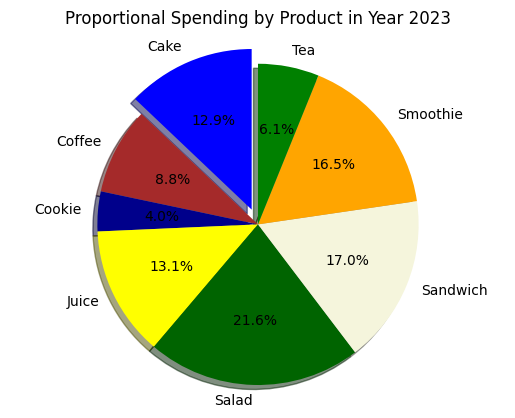

In [17]:
# 4.3. Sales share of products over the year, pie chart
df["Transaction_Date"] = pd.to_datetime(df["Transaction_Date"])

# Group by "Item" and sum "Total Spent"
total_spent_by_item = df.groupby("Item")["Total_Spent"].sum()
explode = (0.1, 0, 0, 0, 0, 0, 0, 0)

# Get the colors for each item from the colors2 dictionary
item_colors = [colors2.get(item, "gray") for item in total_spent_by_item.index]

# Create a pie chart with the sizes proportional to total_spent_by_item values
plt.pie(total_spent_by_item, labels=total_spent_by_item.index, autopct='%1.1f%%', startangle=90, colors=item_colors, explode=explode, shadow=True)

# Adding a title
plt.title("Proportional Spending by Product in Year 2023")

# Display the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

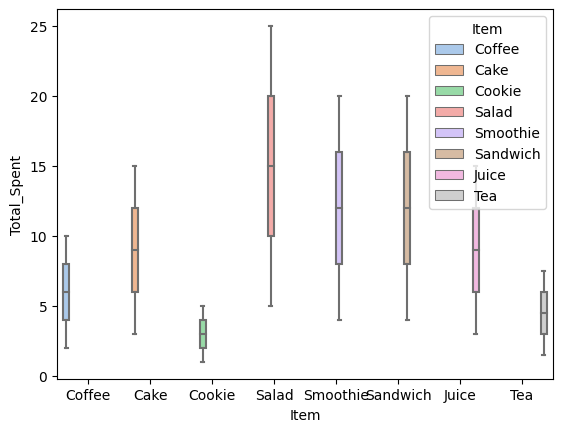

In [18]:
#4.4. Box plot comparing sales of all products in 2023
sns.boxplot(x='Item', y='Total_Spent', hue='Item', data=df, palette='pastel')
plt.show()

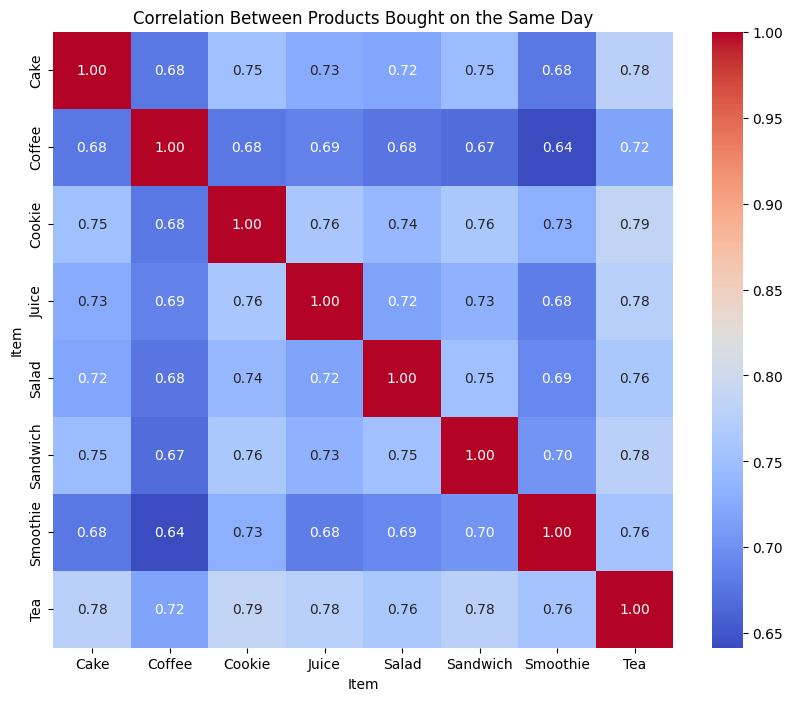

In [19]:
#4.5. Examine co-purchase patterns (items bought on the same day) through binary encoding and correlation heatmaps.
# Heatmap of Correlation Matrix Correlation Between Products Bought on the Same Day
# 1. Creating a table: whether a given product was purchased on a specific day
pivot = df.pivot_table(index='Transaction_Date', columns='Item', aggfunc='size', fill_value=0)

# 2. Correlation between products
corr = pivot.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Products Bought on the Same Day')
plt.show()


# 5. Technologies Used
•	Python 3.10 – main programming language for data analysis and visualization tasks,  
•	pandas – library for data manipulation, preprocessing, and creating pivot tables,  
•	seaborn – statistical data visualization library based on matplotlib; used for creating boxplots and heatmaps,  
•	matplotlib – plotting library underlying seaborn, utilized for figure and axes management,  
•	Jupyter Notebook – interactive development environment used for code execution, visualization, and documentation,  
•	PyCharm Professional 2025 – integrated development environment (IDE) used for structured project development, code management, and debugging.


# 6. GitHub Respository
https://github.com/Glooin/data-science-portfolio